# Stock Market Prediction using Python (LSTM Algorithm)

Menurut akun POEMS, Analisis teknikal merupakan analisa yang memperhatikan dan mempelajari pola-pola grafik, dimana pergerakan saham diidentifikasikan dengan pola-pola tertentu, Oleh karena itu belajar analisa teknikal sangat erat kaitanya dengan belajar membaca grafik/chart.

Dengan menggunakan model regresi kita bisa melakukan prediksi trend atau harga dari saham berdasarkan data historikal yang ada

## Import Packages

In [ ]:
#Import Modules
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Load dataset

Kita akan menarik data dari web yahoo finance, emiten yang akan kita lihat adalah PT Telekomunikasi Indonesia Tbk, dengan kode emiten TLKM

In [ ]:
df = web.DataReader('TLKM.jk',
                    data_source='yahoo',
                    start='2005-09-30',
                    end='2020-09-23')

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-09-30,1080.0,1040.0,1070.0,1070.0,213815000.0,176.604263
2005-10-03,1080.0,1030.0,1060.0,1060.0,74412500.0,174.953796
2005-10-04,1110.0,1070.0,1080.0,1080.0,111667500.0,178.254807
2005-10-05,1090.0,1070.0,1080.0,1080.0,74335000.0,178.254807
2005-10-06,1080.0,1040.0,1060.0,1060.0,89692500.0,174.953796


In [ ]:
df.shape

(3692, 6)

### Make Visualization from the data

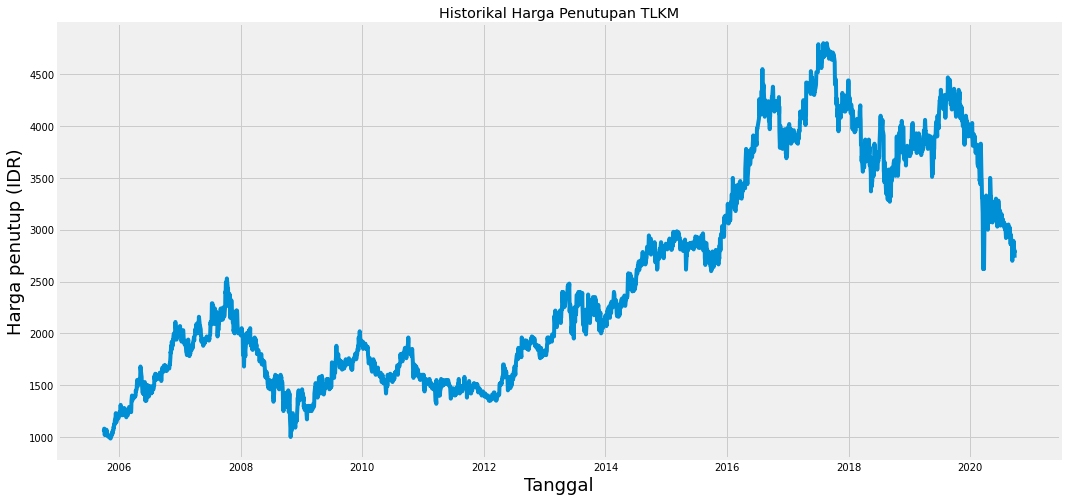

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Historikal Harga Penutupan TLKM')
plt.plot(df['Close'])
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga penutup (IDR)', fontsize=18)
plt.show()

## Data Preparation

In [ ]:
#Kita ambil hanya kolom harga penutupan
data = df.filter(['Close'])

In [ ]:
#kita ambil hanya nilainya saja
dataset = data.values

In [ ]:
#kita akan memisahkan data training dengan data testing sebanyak 80 : 20
training_data_len = math.ceil(len(dataset) * .8)


In [ ]:
#kita cek jumlah data trainig
print(training_data_len)

2954


### Scaling
Menyamakan range agar meningkatkan performa model

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#check for scaled data
scaled_data

array([[0.02228047],
       [0.01965924],
       [0.0249017 ],
       ...,
       [0.47051114],
       [0.4757536 ],
       [0.45740498]])

### Menyiapkan data training

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  #check for a bunch of x_train and y _train
  if i <=60:
    print(x_train)
    print()
    print(y_train)
    print()

[array([0.02228047, 0.01965924, 0.0249017 , 0.0249017 , 0.01965924,
       0.00917431, 0.01441678, 0.01441678, 0.01441678, 0.00917431,
       0.01441678, 0.01441678, 0.02228047, 0.01441678, 0.01179554,
       0.01179554, 0.01179554, 0.00655308, 0.00655308, 0.00655308,
       0.00655308, 0.00393185, 0.00655308, 0.00131062, 0.00131062,
       0.        , 0.00262123, 0.0078637 , 0.00655308, 0.00655308,
       0.01179554, 0.01441678, 0.01441678, 0.01179554, 0.01965924,
       0.01703801, 0.02228047, 0.02228047, 0.03014417, 0.02752294,
       0.0327654 , 0.03800786, 0.03538663, 0.04587156, 0.04587156,
       0.04849279, 0.05635649, 0.06422018, 0.05897772, 0.05111402,
       0.0406291 , 0.05635649, 0.05635649, 0.05897772, 0.05897772,
       0.05373526, 0.05373526, 0.05111402, 0.05111402, 0.06159895])]

[0.06422018348623854]



In [ ]:
#mengubah data menjadi format numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
x_train = np.reshape(x_train, (
    x_train.shape[0],
    x_train.shape[1],
    1
))

## Modeling

### Build Model Architecture

In [ ]:
#Build Architecture for Neural Network
model = Sequential()
model.add(LSTM(50, return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the architecture
model.compile(optimizer='adam', loss='mean_squared_error')

### Modeling

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
2894/2894 [==============================] - 63s 22ms/step - loss: 0.0010
Epoch 2/100
2894/2894 [==============================] - 63s 22ms/step - loss: 5.3082e-04
Epoch 3/100
2894/2894 [==============================] - 63s 22ms/step - loss: 4.2419e-04
Epoch 4/100
2894/2894 [==============================] - 63s 22ms/step - loss: 3.6619e-04
Epoch 5/100
2894/2894 [==============================] - 63s 22ms/step - loss: 3.2843e-04
Epoch 6/100
2894/2894 [==============================] - 64s 22ms/step - loss: 3.2595e-04
Epoch 7/100
2894/2894 [==============================] - 63s 22ms/step - loss: 2.6058e-04
Epoch 8/100
2894/2894 [==============================] - 62s 22ms/step - loss: 2.6961e-04
Epoch 9/100
2894/2894 [==============================] - 63s 22ms/step - loss: 2.4444e-04
Epoch 10/100
2894/2894 [==============================] - 63s 22ms/step - loss: 2.5997e-04
Epoch 11/100
2894/2894 [==============================] - 64s 22ms/step - loss: 2.3753e-04
Epoch 12/100

## Model Evaluation

### Prepare for data test

In [ ]:
test_data = scaled_data[training_data_len-60:, :]

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#ubah x_test menjadi numpy array
x_test = np.array(x_test)

In [ ]:
#mengubah x test menjadi 3 dimensi
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1],
                     1))

### Make Predictions for Test Data

In [ ]:
predictions = model.predict(x_test)

# mengembalikan lagi ke angka awal (tidak di scaling)
predictions = scaler.inverse_transform(predictions)

### Model Evaluation

Menghitung RMSE dari data prediksi terhadap data asli

In [ ]:
rmse = np.sqrt(np.mean(predictions- y_test)**2)

In [ ]:
print(rmse)

6.4342213038829605


Membuat Visualisasi Hasil Prediksi

In [ ]:
#membuat dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train.head()

,Close
Date,
2005-09-30,1070.0
2005-10-03,1060.0
2005-10-04,1080.0
2005-10-05,1080.0
2005-10-06,1060.0


In [ ]:
valid.head()

,Close,Predictions
Date,,
2017-11-06,4190.0,4061.036865
2017-11-07,4190.0,4149.390137
2017-11-08,4100.0,4154.244629
2017-11-09,4160.0,4074.765869
2017-11-10,4120.0,4128.310059


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


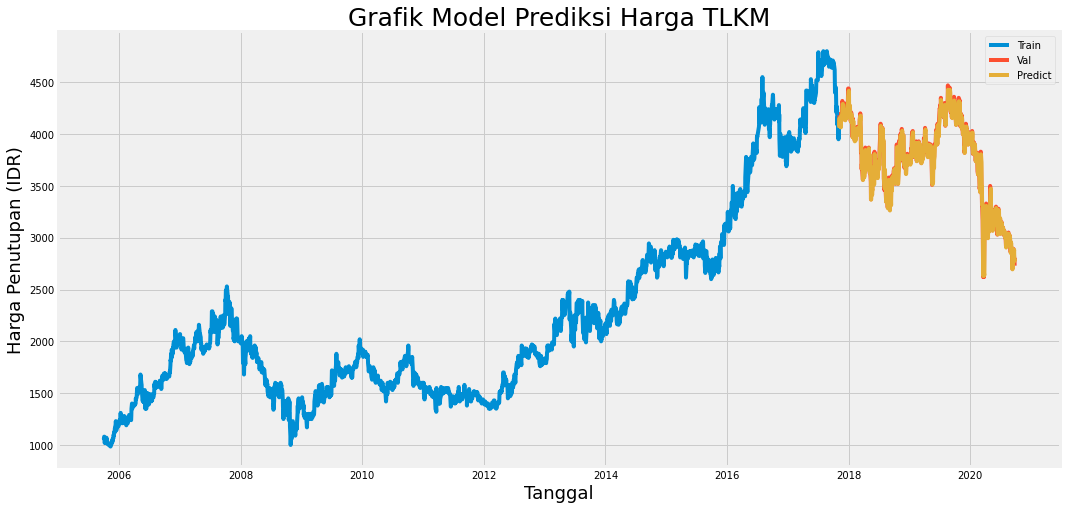

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Grafik Model Prediksi Harga TLKM', fontsize=25)
plt.xlabel('Tanggal',fontsize=18)
plt.ylabel('Harga Penutupan (IDR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

### Predict Next Day Price

In [ ]:
tlkm_quote = web.DataReader('TLKM.jk', data_source='yahoo',
                            start='2012-01-01',
                            end='2020-09-24')
new_df = tlkm_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                    x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2700.608]]


In [ ]:
print("Prediksi Harga Saham TLKM pada penutupan Jum'at, 25 September 2020 ialah : {}".format(pred_price))

Prediksi Harga Saham TLKM pada penutupan Jum'at, 25 September 2020 ialah : [[2700.608]]


In [ ]:
tlkm_quote2 = web.DataReader('TLKM.jk', data_source='yahoo',
                            start='2020-09-24',
                            end='2020-09-24')

Date
2020-09-24    2730
2020-09-25    2700
Name: Close, dtype: int64


In [ ]:
print('Harga TLKM per jam 10:18 WIB adalah : {}'.format(tlkm_quote2['Close'][1]))

2700
